In [1]:
import sqlite3
import pprint
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from os import path

db = sqlite3.connect(path.normpath('D:\\temp\\hf.gnucash'))
cursor = db.cursor()
# start_date = input()
start_date = '2020-01-01'
end_date = '2020-10-01'
query = """
SELECT substr(t.enter_date, 0, 11) AS date,
       a.name AS category,
      (s.value_num / 100.0) AS value
  FROM accounts a,
       splits s,
       transactions t
 WHERE s.account_guid = a.guid AND 
       s.tx_guid = t.guid AND 
       a.account_type = 'EXPENSE' AND 
       strftime('%Y-%m-%d', substr(t.enter_date, 0, 11) ) >= strftime('%Y-%m-%d', '{0}') AND
       strftime('%Y-%m-%d', substr(t.enter_date, 0, 11) ) < strftime('%Y-%m-%d', '{1}')
 ORDER BY date;
""".format(start_date, end_date)
cursor.execute(query)
data = cursor.fetchall()

In [2]:
df = pd.DataFrame(data, columns=['Date', 'Category', 'Value'])
# df = df.convert_objects(convert_numeric=True)
df = df.astype({'Value':'float64', 'Category':'string'})
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
pt = df.pivot_table('Value', index='Category', columns='Date', fill_value=0, aggfunc=np.sum)
pt = pt.resample('w', axis=1).sum()

In [3]:

pd.options.display.float_format = '{:.2f}'.format
pt['Average'] = pt.mean(axis=1)
pt.loc['Total']= pt.sum() 
pt

Date,2020-01-05 00:00:00,2020-01-12 00:00:00,2020-01-19 00:00:00,2020-01-26 00:00:00,2020-02-02 00:00:00,2020-02-09 00:00:00,2020-02-16 00:00:00,2020-02-23 00:00:00,2020-03-01 00:00:00,2020-03-08 00:00:00,...,2020-07-26 00:00:00,2020-08-02 00:00:00,2020-08-09 00:00:00,2020-08-16 00:00:00,2020-08-23 00:00:00,2020-08-30 00:00:00,2020-09-06 00:00:00,2020-09-13 00:00:00,2020-09-20 00:00:00,Average
Category,,,,,,,,,,,,,,,,,,,,,
Без категории,9516.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,390.00,400.00,0.00,0.00,0.00,28500.00,0.00,400.00,1174.54
Благотворительность,0.00,0.00,0.00,0.00,0.00,0.00,30000.00,0.00,0.00,0.00,...,0.00,0.00,2000.00,0.00,0.00,0.00,3000.00,0.00,0.00,921.05
Благоустройство,12401.00,0.00,0.00,0.00,0.00,6633.60,3664.80,0.00,0.00,98453.00,...,0.00,3848.00,0.00,15810.00,13290.00,3100.00,15522.00,0.00,17584.00,8260.52
Вкусняшки,814.60,0.00,0.00,1708.12,0.00,694.60,0.00,0.00,0.00,0.00,...,0.00,680.00,0.00,125.00,0.00,430.00,1460.00,0.00,3496.00,368.81
ЖКХ,200.00,0.00,8233.39,0.00,0.00,350.00,6330.78,0.00,0.00,0.00,...,0.00,250.00,9559.00,0.00,0.00,50.00,10490.00,0.00,70.00,2434.23
Живность,3347.00,0.00,1090.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,610.00,0.00,0.00,0.00,348.45
Лечение,3717.00,0.00,0.00,5380.00,0.00,250.00,3435.80,121.00,0.00,6129.00,...,0.00,35.00,0.00,120.00,1188.09,410.00,0.00,0.00,3940.00,1619.34
Машина,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,191055.00,...,0.00,3441.00,30154.00,1380.00,1380.00,1380.00,30700.00,0.00,6270.00,13188.19
Обеды,3798.00,0.00,1045.00,1550.00,0.00,1249.00,677.50,1041.00,0.00,5192.00,...,0.00,3619.98,610.00,1280.00,170.00,130.00,0.00,0.00,2865.00,1167.14


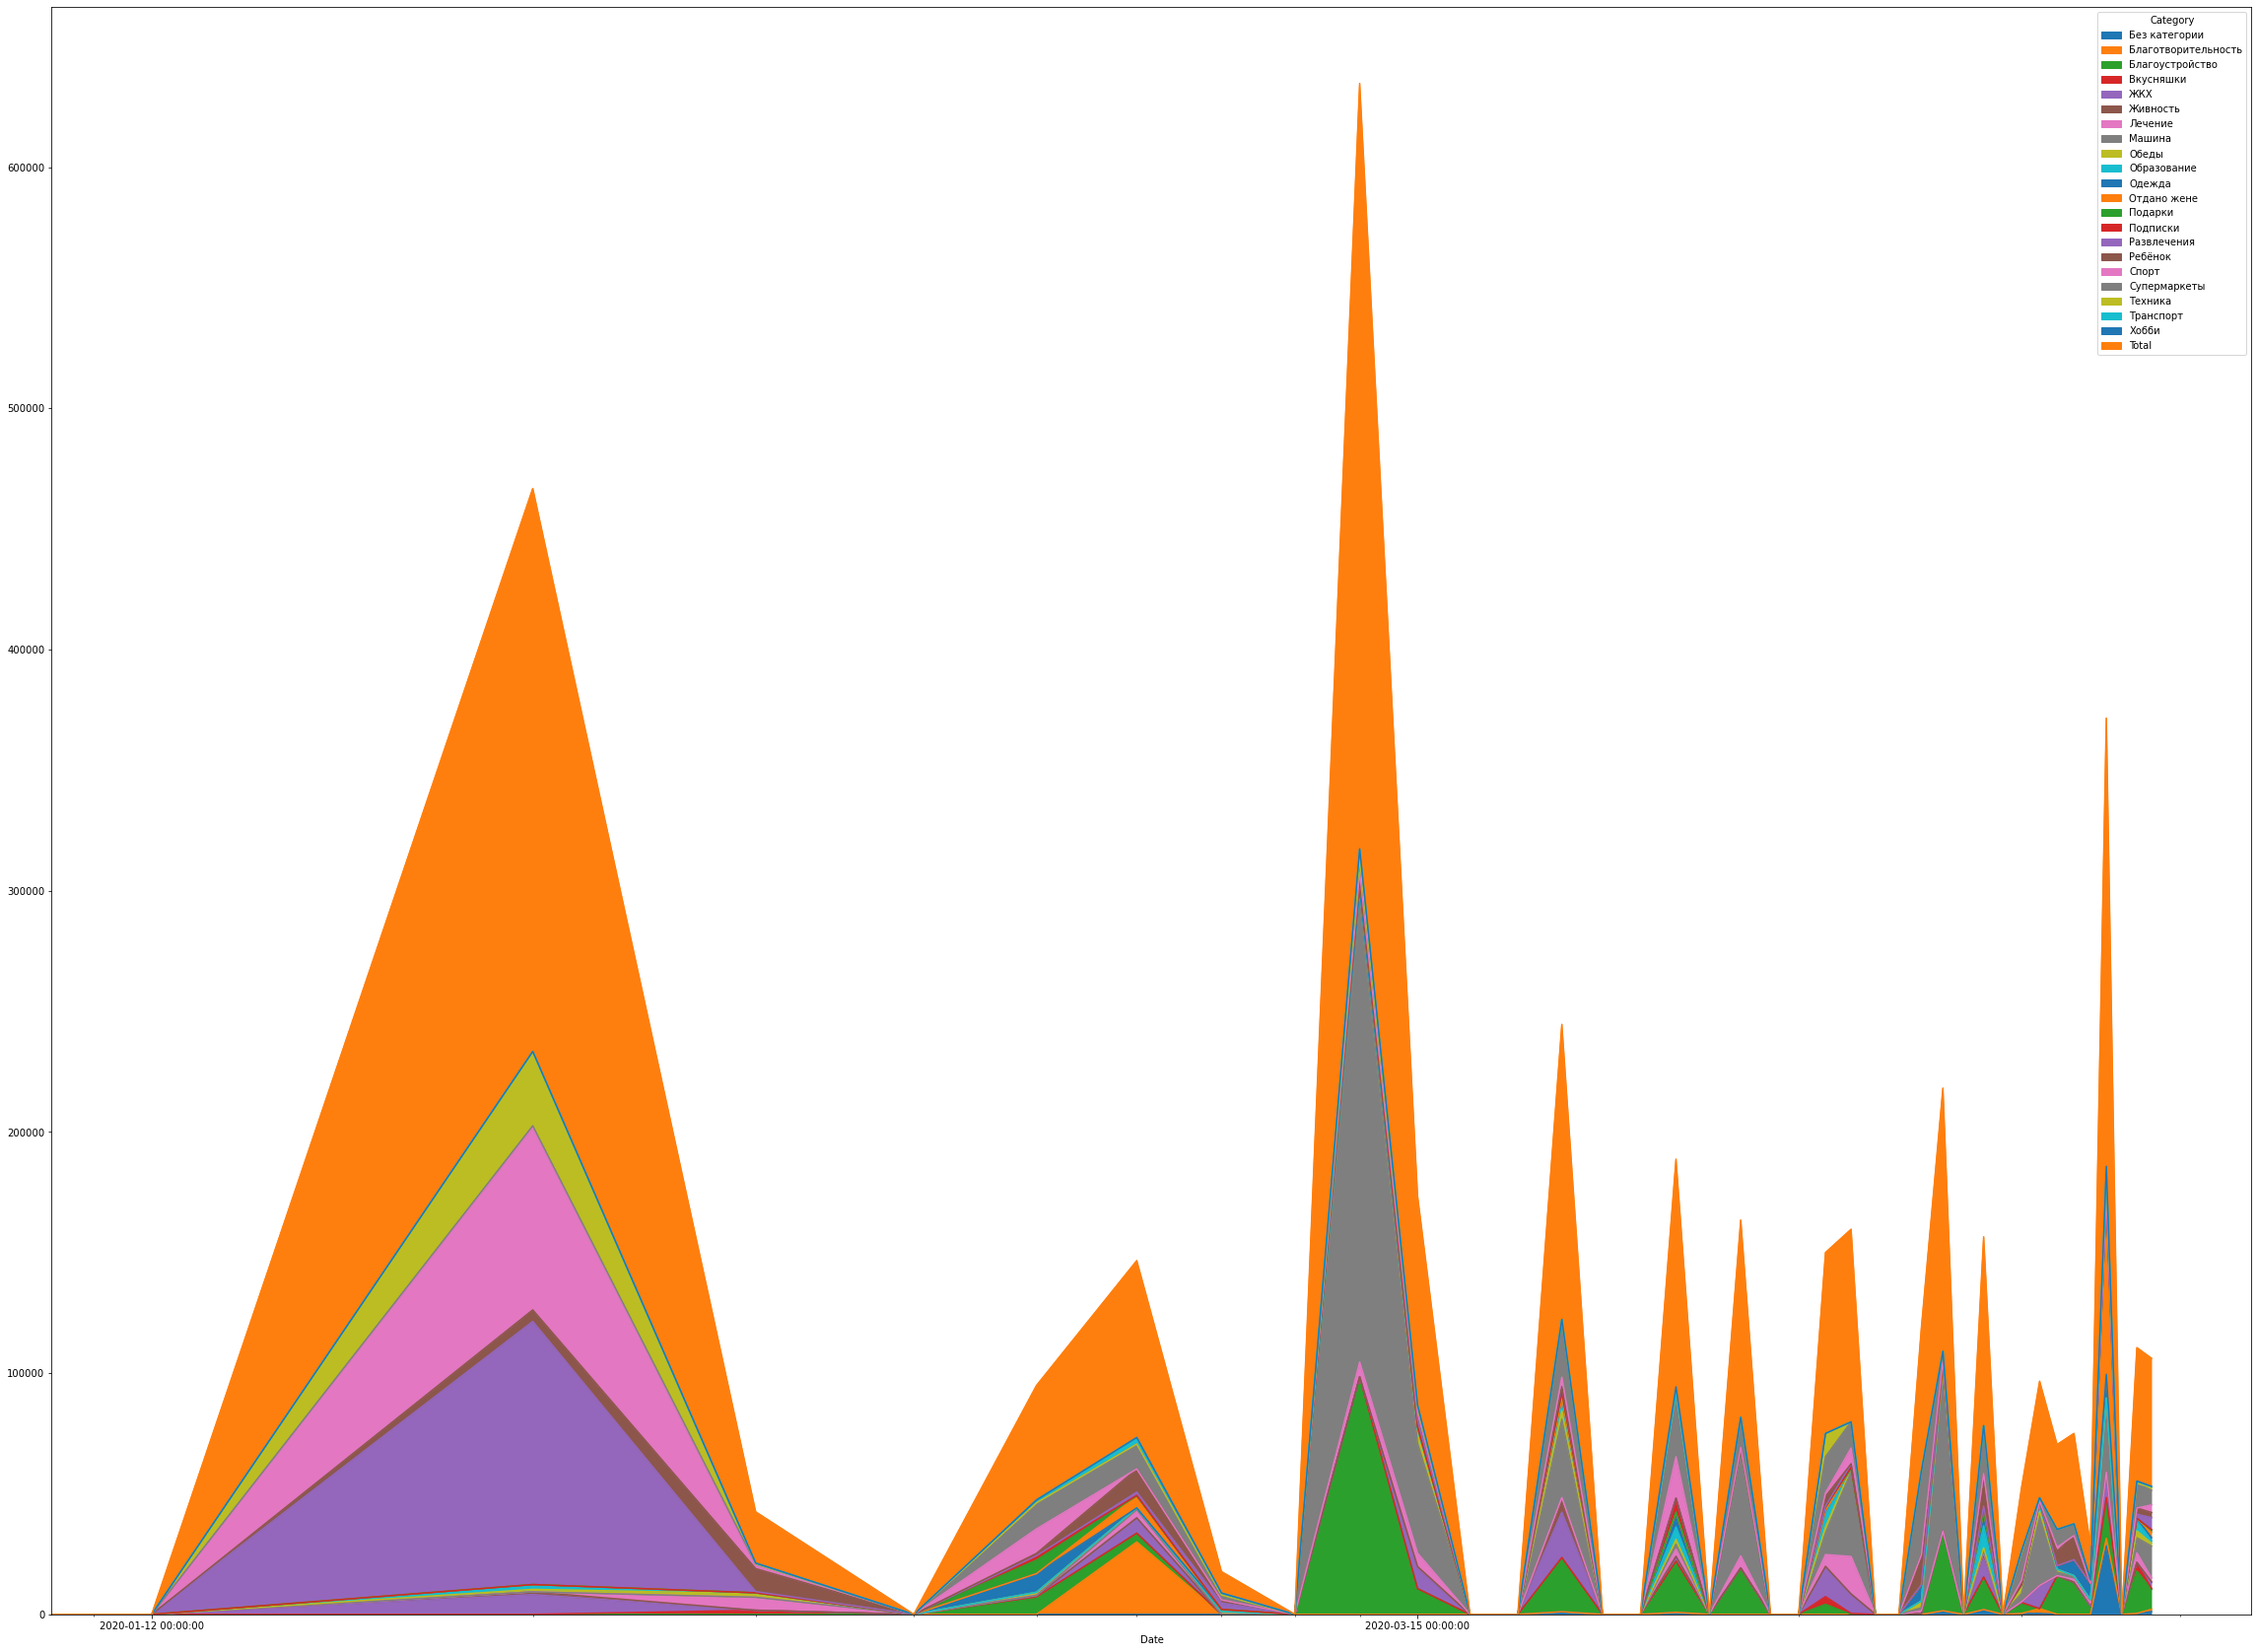

In [4]:
tt = pt
tt = tt.drop(columns=['Average'])
tt = tt.drop(['Total'])
tt = pt.T
tt.plot(kind='area', logx=True, stacked=True, figsize=(40,30))
